## **Proporção de Deputados por Sexo**

#### Este notebook apresenta representações visuais da distribuição dos atuais deputados por sexo em função de estado, partido e espectro ideológico.

In [1]:
from DadosAbertosBrasil import camara
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

#### 1. Obter lista de deputados
A API não trás uma coluna para o sexo do deputado, então precisamos da função 'filtrar_deputados' e adicionar a coluna manualmente.

In [2]:
m = camara.filtrar_deputados(sexo='M')
m['sexo'] = 'M'

f = camara.filtrar_deputados(sexo='F')
f['sexo'] = 'F'

dep = pd.concat([m, f]).drop(columns=['email', 'id', 'idLegislatura', 'urlFoto'])
display(dep.head(10))

,nome,siglaPartido,siglaUf,sexo
0,Abílio Santana,PL,BA,M
1,Abou Anni,PSL,SP,M
2,Acácio Favacho,PROS,AP,M
3,Adolfo Viana,PSDB,BA,M
4,Adriano do Baldy,PP,GO,M
5,Aécio Neves,PSDB,MG,M
6,Afonso Florence,PT,BA,M
7,Afonso Hamm,PP,RS,M
8,Afonso Motta,PDT,RS,M
9,Aguinaldo Ribeiro,PP,PB,M


#### 2. Proporção **Sexo por Estado**

In [3]:
# Agrupar e contar deputados por estado e por sexo
dep1 = dep[['siglaUf', 'sexo', 'nome']].groupby(['siglaUf', 'sexo']).count().reset_index()

# Pivotar tabela
dep1 = dep1.pivot(index='siglaUf', columns='sexo', values='nome').fillna(0).astype(int)

# Calcular e ordenar por proporção de mulheres
dep1['P'] = dep1.F / (dep1.F + dep1. M)
dep1.sort_values(by='P', inplace=True)

display(dep1)

sexo,F,M,P
siglaUf,,,
MA,0,18,0.000000
AM,0,8,0.000000
SE,0,8,0.000000
PE,1,24,0.040000
CE,1,21,0.045455
PA,1,16,0.058824
MG,4,49,0.075472
BA,3,36,0.076923
PB,1,11,0.083333


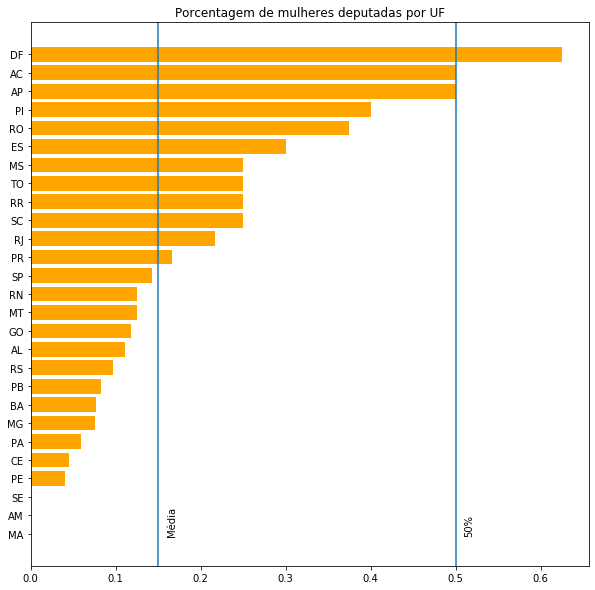

In [4]:
# Plotar gráfico
plt.figure(figsize=(10,10))
plt.barh(dep1.index, dep1.P, color='orange')

# Média
media = dep[dep.sexo == 'F'].sexo.count() / dep.sexo.count()

# Plotar barras verticais de referência
plt.axvline(media)
plt.text(media + 0.01,0,'Média',rotation=90)
plt.axvline(0.5)
plt.text(0.51,0,'50%',rotation=90)

# Formatar gráfico
plt.title('Porcentagem de mulheres deputadas por UF')
plt.show()

#### 3. Proporção **Sexo por Partido**

In [5]:
# Agrupar e contar deputados por estado e por sexo
dep2 = dep[['siglaPartido', 'sexo', 'nome']].groupby(['siglaPartido', 'sexo']).count().reset_index()

# Pivotar tabela
dep2 = dep2.pivot(index='siglaPartido', columns='sexo', values='nome').fillna(0).astype(int)

# Calcular e ordenar por proporção de mulheres
dep2['P'] = dep2.F / (dep2.F + dep2. M)
dep2.sort_values(by='P', inplace=True)

display(dep2)

sexo,F,M,P
siglaPartido,,,
PATRIOTA,0,6,0.000000
PSC,0,9,0.000000
PSD,1,35,0.027778
DEM,2,26,0.071429
PTB,1,11,0.083333
PODE,1,10,0.090909
REPUBLICANOS,3,29,0.093750
PROS,1,9,0.100000
PSB,3,27,0.100000


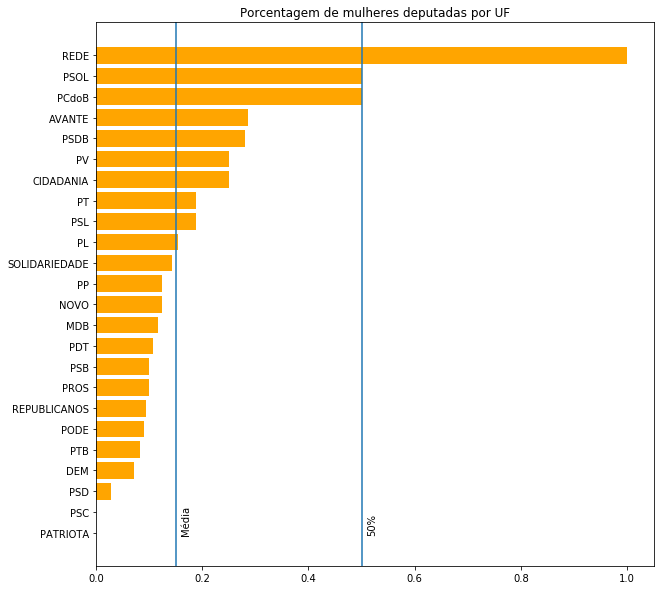

In [6]:
# Plotar gráfico
plt.figure(figsize=(10,10))
plt.barh(dep2.index, dep2.P, color='orange')

# Plotar barras verticais de referência
plt.axvline(media)
plt.text(media + 0.01,0,'Média',rotation=90)
plt.axvline(0.5)
plt.text(0.51,0,'50%',rotation=90)

# Formatar gráfico
plt.title('Porcentagem de mulheres deputadas por UF')
plt.show()

#### 4. Proporção **Sexo por Ideologia**

In [7]:
# Data scrapping: Ideologia dos partidos, segundo Congresso em Foco (2019)
url = "https://pt.wikipedia.org/wiki/Lista_de_partidos_políticos_do_Brasil"
res = requests.get(url).text
tables = BeautifulSoup(res,'lxml').findAll('table', class_='wikitable')
rows = tables[1].findAll('tr')
espectro = pd.DataFrame([[i.findAll('td')[0].text[:-1], i.findAll('td')[7].text[:-1]] for i in rows[1:]], columns=['Partido', 'Ideologia'])
display(espectro)

,Partido,Ideologia
0,Avante,centro
1,DC,direita
2,DEM,direita
3,MDB,centro
4,NOVO,direita
5,Patriota,direita
6,PCB,—
7,PCdoB,esquerda
8,PCO,—
9,PDT,esquerda


In [8]:
# Colocar todos os caracteres em letras maiúsculas antes do merge, para coincidir as siglas
espectro.Partido = espectro.Partido.str.upper()
dep2.reset_index(inplace=True)
dep2.siglaPartido = dep2.siglaPartido.str.upper()

# Unificar os dois DataFrames
dep3 = dep2.merge(right=espectro, how='left', left_on='siglaPartido', right_on='Partido')

# Agrupar e calcular por ideologia
dep3 = dep3[['Ideologia', 'F', 'M']].groupby('Ideologia').sum()
dep3['P'] = dep3.F / (dep3.F + dep3.M)
dep3.sort_values(by='P', inplace=True)

display(dep3)

,F,M,P
Ideologia,,,
direita,30,244,0.109489
centro,18,79,0.185567
esquerda,29,113,0.204225


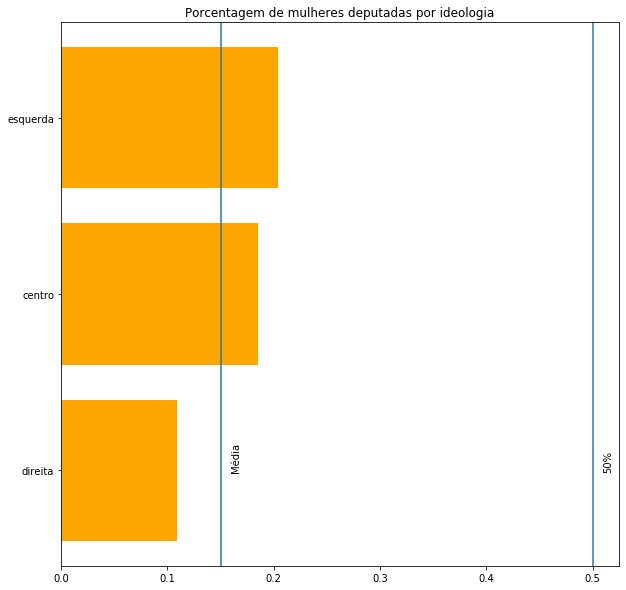

In [9]:
# Plotar gráfico
plt.figure(figsize=(10,10))
plt.barh(dep3.index, dep3.P, color='orange')

# Plotar barras verticais de referência
plt.axvline(media)
plt.text(media + 0.01,0,'Média',rotation=90)
plt.axvline(0.5)
plt.text(0.51,0,'50%',rotation=90)

# Formatar gráfico
plt.title('Porcentagem de mulheres deputadas por ideologia')
plt.show()